(relations-to-other-variables-notebook)=
# Relazioni test-criterio

In questo capitolo, ci focalizziamo su un aspetto specifico della validità precedentemente menzionato: la relazione test-criterio. Per esplorare più a fondo questo concetto, adotteremo un approccio quantitativo, utilizzando la regressione logistica come strumento di indagine. Questo metodo ci permette di valutare in modo dettagliato e preciso come i punteggi di un test possano essere correlati o predittivi rispetto a un determinato criterio esterno, offrendo così una visione più approfondita della validità di un dato strumento di valutazione psicometrica.

In [1]:
# Define a function for formatting numbers
comma <- function(x, d = 2) format(x, digits = d, big.mark = ",")

suppressPackageStartupMessages({
    library(readxl) # for reading excel data
    library(haven) # for reading SPSS data
    library(ROCit) # for ROC analysis
    library(psych)
    library(tidyverse)
    library(modelsummary) # for summarizing data
})

options(repr.plot.width = 7, repr.plot.height = 7 / 1.618033988749895)


<!-- [^2]: Vedremo in seguito -->
<!--     (§ [\[ch:err_stnd_stima\]](#ch:err_stnd_stima){reference-type="ref" -->
<!--     reference="ch:err_stnd_stima"}) come il livello di abilità latente -->
<!--     (il punteggio vero) possa essere stimato con la formula di Kelley -->
<!--     (1923), ovvero $$\begin{aligned} -->
<!--     \hat{T}_i &= \rho_{XT} x_i + (1 - \rho_{XT})\mu_x\notag\\ -->
<!--     &= \mu_x + \rho_{XT} (x_i - \mu_x),\notag\end{aligned}$$ dove -->
<!--     $\mu_x$ è la media dei punteggio osservato e $\hat{T}_i$ è la stima -->
<!--     del punteggio vero per l'$i$-esimo rispondente. -->

<!-- [^3]:  -->

## Analisi della Relazione Test-Criterio mediante la Regressione Logistica

In questo capitolo, esploriamo approfonditamente la relazione tra i punteggi dei test e vari criteri esterni, focalizzandoci su come i test possono predire o differenziare fenomeni specifici. Questo tipo di analisi è cruciale per valutare la validità dei test in contesti pratici e teorici. 

### Categorie di Evidenze basate su Relazioni con Altre Variabili

In psicometria, vengono utilizzate diverse categorie di prove per valutare le relazioni dei punteggi dei test con altre variabili:

1. **Relazioni Test-Criterio:**
   - Queste si concentrano sull'uso dei punteggi dei test per prevedere il rendimento o lo stato attuale in vari ambiti, come l'adattamento accademico o lavorativo.

2. **Differenze tra Gruppi:**
   - Analizziamo se i test evidenziano differenze significative nei punteggi tra gruppi definiti da criteri specifici, come la presenza o assenza di una diagnosi clinica.

3. **Prove di Convergenza e Discriminazione:**
   - Esploriamo se i punteggi di un test sono correlati a quelli di altri test che misurano costrutti simili (validità convergente) e se sono meno correlati a test che misurano costrutti diversi (validità discriminante).

Quando si affronta la questione delle relazioni test-criterio, un aspetto cruciale è la selezione di un criterio appropriato e la valutazione quantitativa della relazione tra il test e il criterio. In situazioni dove il criterio è di natura categorica, come il superamento o il fallimento di un test, la regressione logistica diventa uno strumento essenziale.

La regressione logistica è un metodo statistico usato per analizzare la relazione tra una variabile dipendente binaria e una o più variabili indipendenti. Questa tecnica stima la probabilità che un'osservazione appartenga a una delle categorie della variabile dipendente, basandosi sui valori delle variabili indipendenti.

Supponiamo che una variabile risposta $Y_i$ (per l'osservazione $i$-esima, con $i = 1, \dots, n$) assuma due modalità, definite come successo e insuccesso. Ogni osservazione può essere associata a un vettore di variabili esplicative ($x_1, \dots, x_p$), ma per semplicità, considereremo il caso di una singola variabile indipendente.

Nella regressione logistica, il logaritmo delle probabilità delle due categorie è modellato come una funzione lineare delle variabili indipendenti. Questo ci permette di esaminare come i cambiamenti nelle variabili indipendenti influenzino la probabilità di successo o insuccesso.

Nel contesto dei test psicometrici, la regressione logistica può essere usata per determinare il grado in cui i punteggi di un test sono predittivi di un risultato categorico. Ad esempio, possiamo valutare la probabilità che gli studenti con determinati punteggi ad un test di ammissione universitario riescano o meno nel loro primo anno accademico.

Questo metodo fornisce un quadro più chiaro della validità di un test nel predire risultati specifici, migliorando così l'affidabilità e l'applicabilità dei test in vari contesti. Attraverso l'uso della regressione logistica, possiamo quindi formulare interpretazioni più precise e informate dei risultati dei test, contribuendo a una migliore comprensione della validità di uno strumento psicometrico.

Nello specifico, possiamo dire che l'obiettivo della regressione logistica è studiare la relazione tra la probabilità di risposta

$$
Pr(Y=1 | X=x_i) \equiv Pr(Y_i) \equiv \pi_i
$$

e la variabile esplicativa $x$.

La componente sistematica del modello è espressa come funzione lineare del predittore

$$
\eta_i = logit(\pi_i) = \alpha + \beta x_i.
$$

La componente aleatoria del modello suppone l'esistenza di $k$ osservazioni indipendenti $y_1, y_2, \dots, y_k$, ciascuna delle quali viene trattata come la realizzazione di una variabile casuale $Y_i$.
Nel caso di dati ragruppati, si assume che $Y_i$ abbia una distribuzione binomiale

$$
Y_i \sim Bin(n_i, \pi_i),
$$

con parametri $n_i$ e $\pi_i$. Per dati individuali (uno per ciascun valore $x_i$), $n_i=1, \forall i$.

La funzione link del modello trasforma il predittore lineare nel valore atteso della variabile risposta condizionato alla variabile $X$:

$$
\begin{equation}
\pi_i = g(\eta_i) = \frac{e^{\alpha + \beta x_i}}{1+e^{\alpha + \beta x_i}}.
\end{equation}
$$ (eq-reg-logistic-prob)

In sintesi, la regressione logistica è una tecnica statistica che stima la probabilità che l'evento $Y = 1$ si verifichi per ciascun valore della variabile indipendente $X$.

### Un Esempio Pratico

Per fare un esempio pratico, consideriamo i dati dello studio [Pitfalls When Using Area Under the Curve to Evaluate Item Content for Early Screening Tests for Autism](https://journals.sagepub.com/doi/10.1177/07342829211067128) di Lucas, Brewer e Young (2022).

Il campione raccolto da Nah et al. (2018) include 270 bambini di età compresa tra 12 e 36 mesi (M = 25.4, SD = 7.0). Sulla base di una diagnosi clinica eseguita secondo il DSM-5, 106 bambini sono stati diagnosticati con ASD (*Autism Spectrum Disorder*, Disturbo dello Spettro Autistico), 86 erano in sviluppo non tipico (non-TD) e 78 erano considerati in sviluppo tipico (TD). Qui considereremo solo i gruppi ASD e non-TD.

Il test di interesse è l'*Autism Detection in Early Childhood* (ADEC). Si tratta di una checklist comportamentale composta da 16 item, appositamente sviluppata per rilevare comportamenti pre-verbali che possono essere predittivi dell'autismo nei bambini di età inferiore ai tre anni (Young, 2007).

Leggiamo i dati.

In [2]:
tmp_path <- tempfile(fileext = "xlsx") # temporary file
download.file("https://osf.io/download/tsm7x/", destfile = tmp_path)
dat1 <- readxl::read_xlsx(tmp_path, na = "NA")
dat1$asd <- recode(
    dat1$`Diagnosis(1=Non-typically developing; 2=ASD; 3=Neurotypical)`,
    `1` = "Non-TD",
    `2` = "ASD",
    `3` = "TD"
)
# Filter out Neurotypical
dat1_sub <- filter(dat1, asd != "TD")
glimpse(dat1_sub)


Rows: 192
Columns: 21
$ ID                                                             <dbl> 2, 3, 4…
$ `Sex (1=Male; 2=Female)`                                       <dbl> 1, 1, 2…
$ `Age (in Months)`                                              <dbl> 12, 12,…
$ ADEC_I01                                                       <dbl> 0, 2, 2…
$ ADEC_I02                                                       <dbl> 0, 1, 2…
$ ADEC_I03                                                       <dbl> 0, 0, 0…
$ ADEC_I04                                                       <dbl> 0, 1, 2…
$ ADEC_I05                                                       <dbl> 0, 1, 0…
$ ADEC_I06                                                       <dbl> 0, 1, 2…
$ ADEC_I07                                                       <dbl> 2, 2, 2…
$ ADEC_I08                                                       <dbl> 0, 1, 1…
$ ADEC_I09                                                       <dbl> 0, 0, 1…
$ ADEC_I10        

Iniziamo trovando il punteggio totale ADEC. Si noti che la somma sarà NA se un item è NA.

In [3]:
dat1_sub$ADEC <- rowSums(select(dat1_sub, ADEC_I01:ADEC_I16)) # NA if any item is NA
# Or treat missing as 0
dat1_sub$ADEC_rm_na <- rowSums(select(dat1_sub, ADEC_I01:ADEC_I16), na.rm = TRUE)

Utilizzeremo il modello di regressione logistica per esaminare la relazione tra il punteggio totale del test ADEC e la probabilità che il bambino appartenga al gruppo diagnostico ASD.

Esaminiamo la distribuzione del punteggio totale di ADEC in base alla diagnosi:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Warning message:
“Removed 12 rows containing non-finite outside the scale range (`stat_bin()`).”


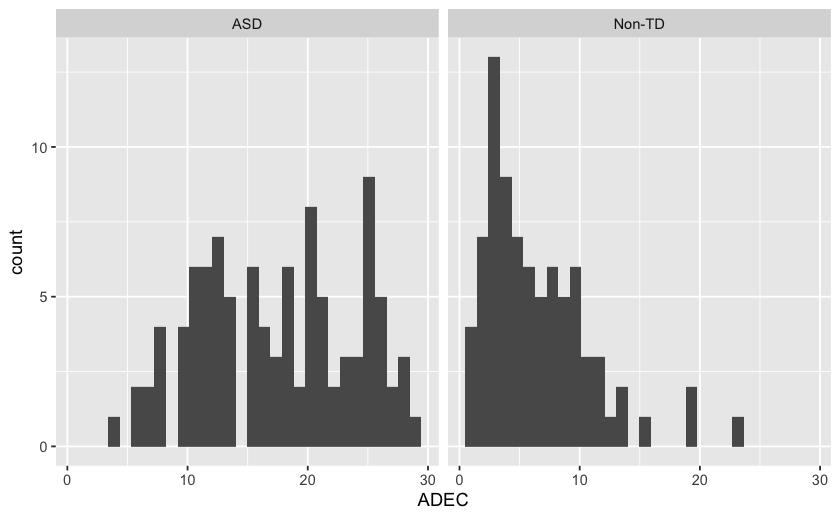

In [4]:
ggplot(dat1_sub, aes(x = ADEC)) +
    geom_histogram() +
    facet_wrap(~asd)

Ricodifichiamo `asd` in modo tale che assuma valore 1 per i bambini con ASD e 0 altrimenti.

In [5]:
dat1_sub$y <- ifelse(dat1_sub$asd == "ASD", 1, 0)
dat1_sub$y

[1] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 [38] 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1
 [75] 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1
[112] 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
[149] 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1
[186] 1 0 0 1 0 0 0

Eseguiamo l'analisi di regressione logistica usando la funzione ´glm()´.

In [6]:
fm <- glm(y ~ ADEC, family = binomial(link="logit"), data = dat1_sub)

Esaminiamo i risultati.

In [7]:
summary(fm)


Call:
glm(formula = y ~ ADEC, family = binomial(link = "logit"), data = dat1_sub)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.76480    0.58071  -6.483 8.99e-11 ***
ADEC         0.35447    0.05201   6.816 9.37e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 247.73  on 179  degrees of freedom
Residual deviance: 131.12  on 178  degrees of freedom
  (12 observations deleted due to missingness)
AIC: 135.12

Number of Fisher Scoring iterations: 6


Creiamo un grafico che mostri la relazione tra la probabilità che Y = 1 (cioè la diagnosi di ASD per il bambino), calcolata utilizzando i coefficienti del modello di regressione logistica, e il punteggio ottenuto nella scala ADEC.

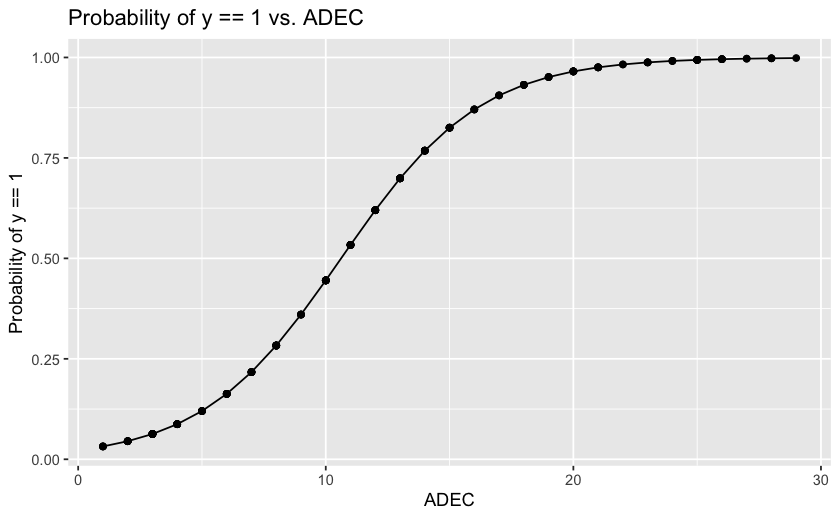

In [8]:
# Filter out rows with missing values in ADEC column
dat1_sub <- na.omit(dat1_sub)
# Predict the probabilities of y == 1 for the filtered data
predictions <- predict(fm, type = "response")
# Create a data frame with ADEC and the predicted probabilities
plot_data <- data.frame(ADEC = dat1_sub$ADEC, Prob_Y_1 = predictions)

# Plot the probability of y == 1 as a function of ADEC
library(ggplot2)
ggplot(plot_data, aes(x = ADEC, y = Prob_Y_1)) +
    geom_line() +
    geom_point() +
    xlab("ADEC") +
    ylab("Probability of y == 1") +
    ggtitle("Probability of y == 1 vs. ADEC")

Il grafico presenta una curva sigmoidale che illustra come, per punteggi bassi nella scala ADEC, la probabilità di una diagnosi di autismo sia bassa, mentre per punteggi alti nella scala ADEC, la probabilità di una diagnosi di autismo sia alta.

### Accuratezza della classificazione

Una volta compreso come il modello di regressione logistica associa a ciascun valore di $x$ la probabilità dell'evento $y = 1$, esaminiamo ora come sia possibile utilizzare questo modello per valutare l'accuratezza di una classificazione binaria. Nel nostro caso, la classificazione riguarda ciascuna osservazione nelle categorie ASD e Non-TD. In questo contesto, il modello di regressione logistica stima la probabilità di appartenenza a una delle due categorie basandosi sui valori di ADEC (eq. {eq}`eq-reg-logistic-prob`).

Per effettuare la classificazione, dobbiamo stabilire un punto di taglio (cut-off) che separi le due categorie. Questo punto di taglio definisce il valore della variabile dipendente al di sopra del quale l'osservazione sarà assegnata alla categoria positiva (y = 1, ovvero ASD) e al di sotto del quale sarà assegnata alla categoria negativa (y = 0). La scelta del punto di taglio è critica poiché influisce sull'accuratezza delle previsioni del modello.

I coefficienti di regressione stimati dalla regressione logistica sono i parametri del modello che descrivono la relazione tra la variabile indipendente ADEC e la probabilità di appartenenza alla categoria positiva (y = 1). Questi coefficienti ci consentono di calcolare la probabilità stimata di y = 1 per ciascuna osservazione, utilizzando l'eq. {eq}`eq-reg-logistic-prob`. Una volta calcolata la probabilità stimata di y = 1 per ogni osservazione, possiamo utilizzare un determinato punto di taglio (ad esempio, 0.5) per classificare le osservazioni nelle due categorie y = 0 e y = 1. Se la probabilità stimata è maggiore o uguale al punto di taglio, l'osservazione verrà classificata come y = 1 (positiva); altrimenti, verrà classificata come y = 0 (negativa).

Tuttavia, la scelta del punto di taglio non è banale e ha un impatto diretto sulla sensibilità (la proporzione dei casi positivi effettivi che il test identifica correttamente come positivi) e specificità (la proporzione dei casi negativi effettivi che il test identifica correttamente come negativi) del modello. Un punto di taglio più alto potrebbe aumentare la specificità, ma ridurre la sensibilità, mentre un punto di taglio più basso avrebbe l'effetto opposto.

Per ottenere una valutazione più completa delle prestazioni del modello, consideriamo tutti i possibili punti di taglio e visualizziamo la relazione tra sensibilità e specificità tramite la curva ROC (Receiver Operating Characteristic). Questa curva è un grafico che mostra come variano sensibilità e specificità al variare del punto di taglio. Un elemento chiave della curva ROC è l'*Area Under the Curve* (AUC), che rappresenta una misura aggregata dell'accuratezza complessiva del modello. L'AUC calcola l'area sottesa alla curva ROC e riflette la capacità del modello di discriminare tra le due categorie di risultato. L'AUC, dunque, fornisce una misura sintetica dell'accuratezza del modello su tutta la gamma di possibili punti di taglio. Un valore di AUC pari a 1 indica una perfetta capacità di discriminazione, mentre un valore pari a 0.5 indica una capacità di discriminazione casuale.

Per mostrare come trovare l'AUC, iniziamo calcolando l'accuratezza della classificazione mediante un valore di cut-off pari a 0.5, ad esempio.

In [9]:
# Predict the probabilities of y == 1 for the filtered data
prob_pred <- predict(fm, type = "response")

# Use cut-off 0.5 for classification
classification <- ifelse(prob_pred >= 0.5, 1, 0)

# Classification accuracy
mean(classification == dat1_sub$y)


[1] 0.8555556

Con il cut-off di 0.5, l'accuratezza è 0.855, ovvero l'86% dei casi è stato correttamente classificato dal test. Vogliamo però trovare l'accuratezza della classificazione per tutti i possibili valori di cut-off. Costruiamo dunque la curva ROC in R.

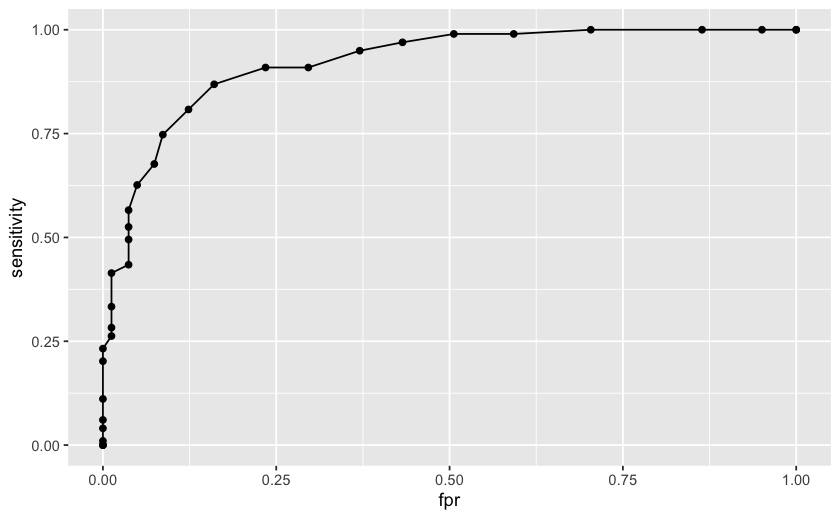

In [10]:
compute_sens <- function(
    cut, x = dat1_sub$ADEC,
    crit = dat1_sub$asd == "ASD") {
    tp <- sum(x >= cut & crit, na.rm = TRUE)
    fn <- sum(x < cut & crit, na.rm = TRUE)
    tp / (tp + fn)
}
compute_spec <- function(
    cut, x = dat1_sub$ADEC,
    crit = dat1_sub$asd == "ASD") {
    tn <- sum(x < cut & !crit, na.rm = TRUE)
    fp <- sum(x >= cut & !crit, na.rm = TRUE)
    tn / (tn + fp)
}
sensitivity <- lapply(32:0, compute_sens) |>
    unlist()
specificity <- lapply(32:0, compute_spec) |>
    unlist()
data.frame(sensitivity, fpr = 1 - specificity) |>
    ggplot(aes(x = fpr, y = sensitivity)) +
    geom_point() +
    geom_line()

Una volta costruita la curva ROC possiamo calcolare l'area sottesa alla curva ROC.

In [11]:
# AUC
dfpr <- c(diff(1 - specificity), 0)
dsens <- c(diff(sensitivity), 0)
sum(sensitivity * dfpr) + sum(dsens * dfpr) / 2

[1] 0.920626

Se consideriamo tutti i possibili valori di cut-off, l'accuratezza risulta uguale a 0.92. Questo valore indica un'ottima capacità del modello di regressione logistica nel discriminare con precisione i bambini con diagnosi di autismo da quelli senza.

Questi risultati suggeriscono che la scala ADEC è uno strumento utile e valido per identificare precocemente i bambini a rischio di sviluppare un disturbo dello spettro autistico. La sua elevata accuratezza predittiva consente di fornire una valutazione tempestiva e accurata per l'intervento precoce e il supporto necessario ai bambini e alle loro famiglie. In conclusione, l'analisi di regressione logistica e il calcolo dell'AUC hanno fornito evidenze solide sulla validità predittiva della scala ADEC nella diagnosi precoce dell'autismo. 

#### Pacchetto ROCit

Si noti che si possono ottenere gli stessi risultati trovati sopra usando le funzioni del pacchetto ROCit.

In [12]:
roc_adec <- rocit(dat1_sub$ADEC, class = dat1_sub$asd == "ASD")

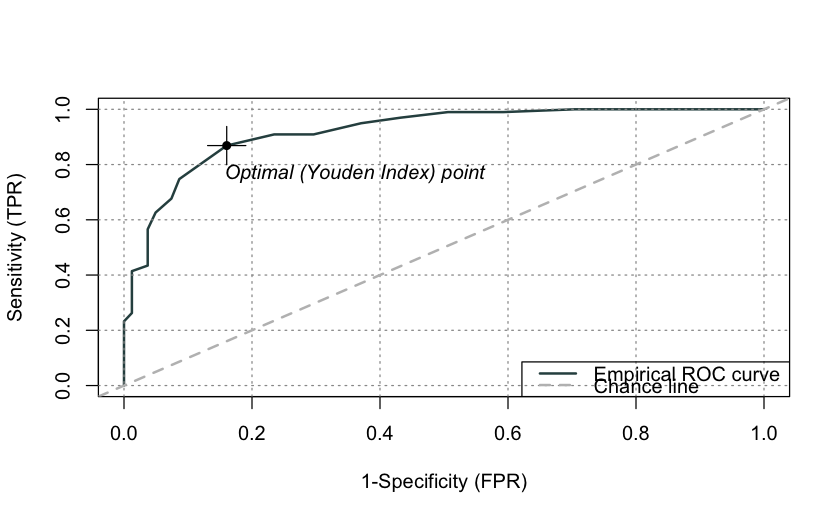

In [13]:
plot(roc_adec)

In [14]:
summary(roc_adec)

                          
 Method used: empirical   
 Number of positive(s): 99
 Number of negative(s): 81
 Area under curve: 0.9206 


In [15]:
ciAUC(roc_adec)

                                                          
   estimated AUC : 0.920626013218606                      
   AUC estimation method : empirical                      
                                                          
   CI of AUC                                              
   confidence level = 95%                                 
   lower = 0.880257283328194     upper = 0.960994743109017

## Considerazioni conclusive

In conclusione, il capitolo ha dimostrato l'utilizzo dell'analisi di regressione logistica e del calcolo dell'Area Under the Curve (AUC) come strumenti importanti per valutare la validità di criterio di un test, specialmente quando il criterio riguarda l'appartenenza a un gruppo diagnostico specifico.

L'analisi di regressione logistica e il calcolo dell'AUC forniscono una valutazione accurata della capacità del test di classificare correttamente i partecipanti in base al criterio diagnostico desiderato. Questa valutazione accurata offre una solida base per l'applicazione pratica del test, consentendo decisioni informate e mirate nell'identificazione di individui con particolari caratteristiche o condizioni. Inoltre, l'utilizzo di questi strumenti statistici rappresenta un passo importante verso la validazione dei test, garantendo la qualità delle diagnosi e facilitando l'implementazione di interventi mirati ed efficaci. La corretta valutazione della validità di criterio è essenziale per ottenere risultati affidabili e utili nella pratica clinica e nella ricerca.
